In [140]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
import os

from pandas.core.config_init import pc_width_doc

sns.set_theme()

In [141]:
# Define file paths as a list
file_paths = [
    './input/SINASC_RO_2019_MAR.csv',
    './input/SINASC_RO_2019_ABR.csv',
    './input/SINASC_RO_2019_MAI.csv',
    './input/SINASC_RO_2019_JUN.csv',
    './input/SINASC_RO_2019_DEZ.csv'
]

# Check if each file exists
for file_path in file_paths:
    if not os.path.exists(file_path):
        print(f"Error: the file '{file_path}' does not exist. Please check the path.")
    else:
        # Process the file (e.g., read the CSV)
        print(f"Processing file: {file_path}")

Error: the file './input/SINASC_RO_2019_MAR.csv' does not exist. Please check the path.
Error: the file './input/SINASC_RO_2019_ABR.csv' does not exist. Please check the path.
Error: the file './input/SINASC_RO_2019_MAI.csv' does not exist. Please check the path.
Error: the file './input/SINASC_RO_2019_JUN.csv' does not exist. Please check the path.
Error: the file './input/SINASC_RO_2019_DEZ.csv' does not exist. Please check the path.


In [142]:
sinasc.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 27028 entries, 0 to 27027
Data columns (total 69 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   ORIGEM        27028 non-null  int64  
 1   CODESTAB      26913 non-null  float64
 2   CODMUNNASC    27028 non-null  int64  
 3   LOCNASC       27028 non-null  int64  
 4   IDADEMAE      27028 non-null  int64  
 5   ESTCIVMAE     26711 non-null  float64
 6   ESCMAE        26716 non-null  object 
 7   CODOCUPMAE    24121 non-null  float64
 8   QTDFILVIVO    25455 non-null  float64
 9   QTDFILMORT    24930 non-null  float64
 10  CODMUNRES     27028 non-null  int64  
 11  GESTACAO      25796 non-null  object 
 12  GRAVIDEZ      26949 non-null  object 
 13  PARTO         26979 non-null  object 
 14  CONSULTAS     27028 non-null  int64  
 15  DTNASC        27028 non-null  object 
 16  HORANASC      27007 non-null  float64
 17  SEXO          27024 non-null  object 
 18  APGAR1        26932 non-nu

In [143]:
sinasc.DTNASC.value_counts()

DTNASC
2019-04-10    116
2019-03-21    109
2019-09-25    108
2019-09-02    105
2019-12-04    104
             ... 
2019-02-09     44
2019-12-25     44
2019-07-28     44
2019-08-04     43
2019-11-03     40
Name: count, Length: 365, dtype: int64

In [144]:
def plota_pivot_table(df, value, index, func, ylabel, xlabel, opcao='nada'):
    if opcao == 'nada':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).plot(figsize=[15, 5])
    elif opcao == 'sort':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).sort_values(value).plot(figsize=[15, 5])
    elif opcao == 'unstack':
        pd.pivot_table(df, values=value, index=index,
                       aggfunc=func).unstack().plot(figsize=[15, 5])
    plt.ylabel(ylabel)
    plt.xlabel(xlabel)
    return None

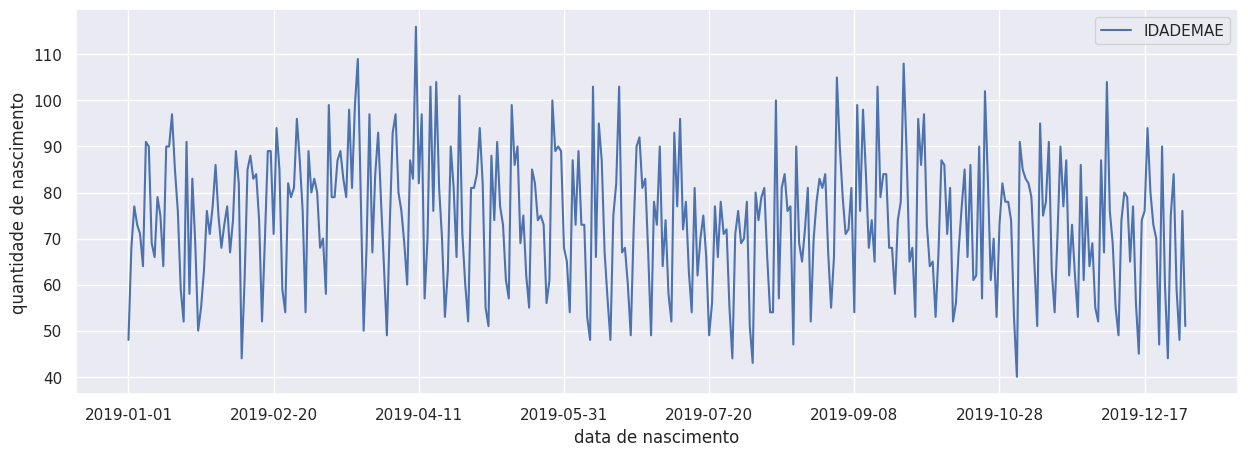

In [145]:
plota_pivot_table(sinasc, 'IDADEMAE', 'DTNASC', 'count', 'quantidade de nascimento','data de nascimento')

In [164]:
max_data = sinasc.DTNASC.max()[:7]
max_data

'2019-12'

In [162]:
os.makedirs('~Desktop/sinasc_img'+max_data, exist_ok=True)

FileNotFoundError: [Errno 2] No such file or directory: '~/Desktop/sinasc_img/2019-12/media idade mae por sexo.png'

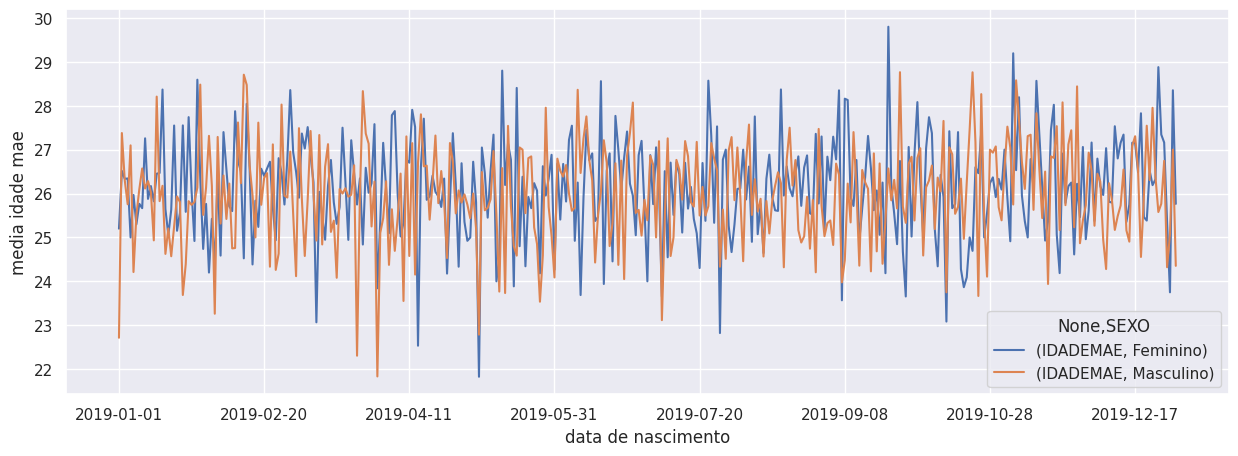

In [165]:
plota_pivot_table(sinasc, 'IDADEMAE', ['DTNASC', 'SEXO'], 'mean', 'media idade mae','data de nascimento','unstack')
plt.savefig('~/Desktop/sinasc_img/'+max_data+'/media idade mae por sexo.png')

FileNotFoundError: [Errno 2] No such file or directory: '~/Desktop/sinasc_img/2019-12/media peso bebe por sexo.png'

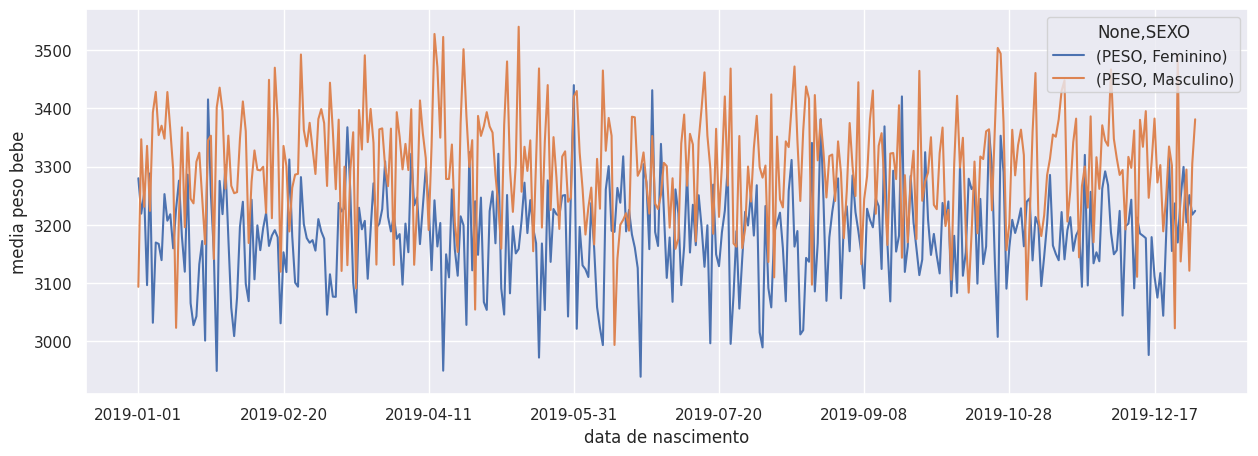

In [166]:
plota_pivot_table(sinasc, 'PESO', ['DTNASC', 'SEXO'], 'mean', 'media peso bebe','data de nascimento','unstack')
plt.savefig('~/Desktop/sinasc_img/'+max_data+'/media peso bebe por sexo.png')

FileNotFoundError: [Errno 2] No such file or directory: '~/Desktop/sinasc_img/2019-12/media apgar1 por escolaridade mae.png'

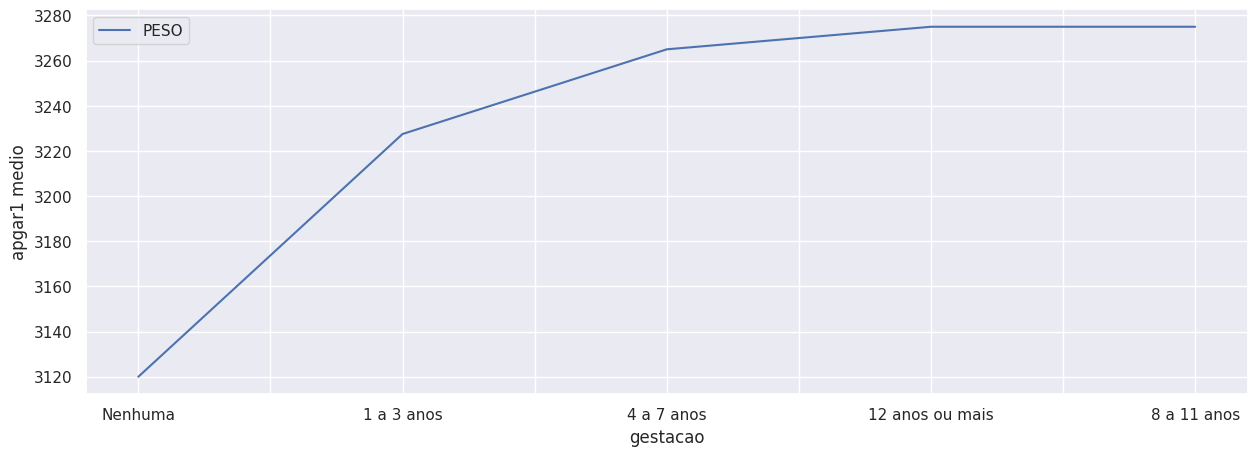

In [167]:
plota_pivot_table(sinasc, 'PESO', 'ESCMAE', 'median', 'apgar1 medio','gestacao','sort')
plt.savefig('~/Desktop/sinasc_img/'+max_data+'/media apgar1 por escolaridade mae.png')

FileNotFoundError: [Errno 2] No such file or directory: '~/Desktop/sinasc_img/2019-12/media apgar1 por gestacao.png'

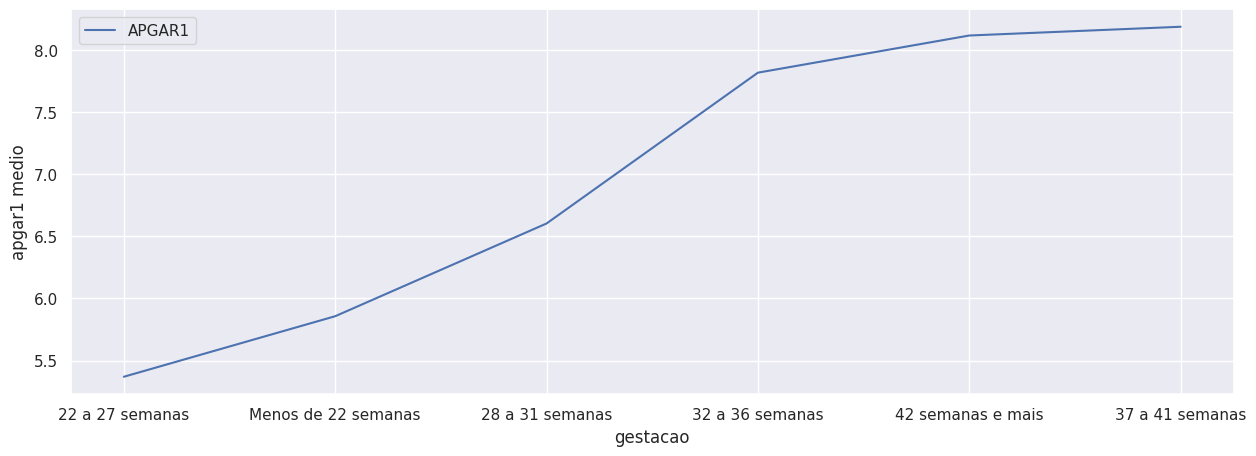

In [168]:
plota_pivot_table(sinasc, 'APGAR1', 'GESTACAO', 'mean', 'apgar1 medio','gestacao','sort')
plt.savefig('~/Desktop/sinasc_img/'+max_data+'/media apgar1 por gestacao.png')

FileNotFoundError: [Errno 2] No such file or directory: '~/Desktop/sinasc_img/2019-12/media apgar5 por gestacao.png'

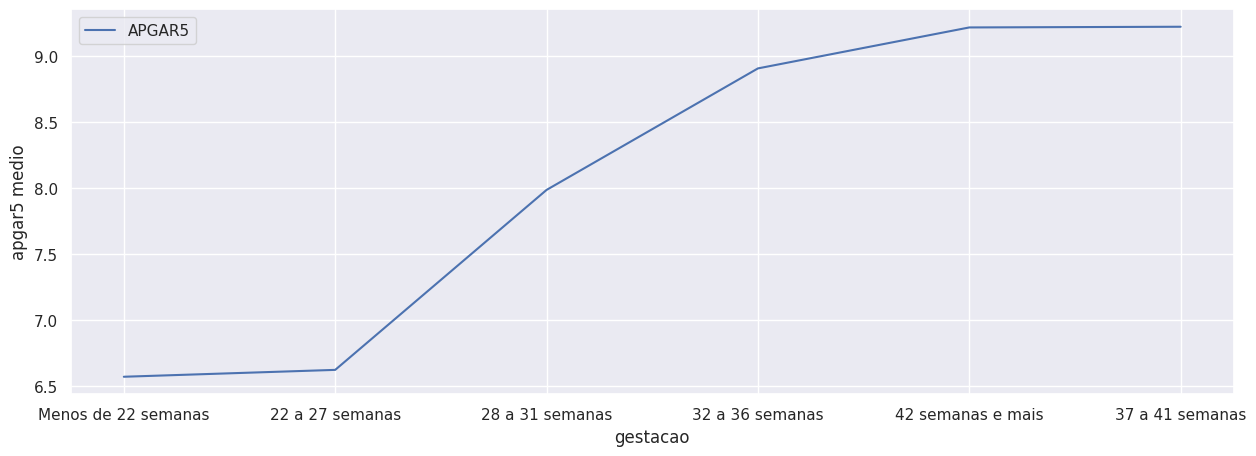

In [169]:
plota_pivot_table(sinasc, 'APGAR5', 'GESTACAO', 'mean', 'apgar5 medio','gestacao','sort')
plt.savefig('~/Desktop/sinasc_img/'+max_data+'/media apgar5 por gestacao.png')

In [120]:
def plot_and_save(dataframe, x_col, y_col, agg_func, title, save_dir, year=None, month=None):
    """
    Automatiza a geração e salvamento de gráficos.

    Parâmetros:
        dataframe (DataFrame): O DataFrame com os dados de entrada.
        x_col (str): A coluna que será usada no eixo X.
        y_col (str): A coluna que será usada no eixo Y.
        agg_func (str): A função de agregação, ex. 'sum', 'count', etc.
        title (str): Título do gráfico.
        save_dir (str): Diretório base onde os gráficos serão salvos.
        year (str/int, opcional): Ano para organização.
        month (str/int, opcional): Mês para organização.

    """
    # Cria o diretório conforme ano/mês especificados
    if year:
        save_dir = os.path.join(save_dir, str(year))
    if month:
        save_dir = os.path.join(save_dir, str(month).zfill(2))  # Garante o formato 01, 02...
    os.makedirs(save_dir, exist_ok=True)

    # Processa e cria o gráfico
    pivot_table = dataframe.pivot_table(index=x_col, columns=y_col, aggfunc=agg_func)
    pivot_table.plot(title=title)

    # Determina o nome do arquivo
    file_name = title.lower().replace(" ", "_") + ".png"
    file_path = os.path.join(save_dir, file_name)

    # Salva o gráfico
    plt.savefig(file_path)
    plt.show()
    print(f"Gráfico salvo em: {file_path}")

# Exemplo de uso
# plot_and_save(sinasc, 'IDADEMAE', 'DTNASC', 'count',

Esse código permitiria as seguintes automações:
1. **Organização por Diretórios Anuais/Mensais**: Ajuda a categorizar gráficos por períodos automaticamente (anos/meses) sem intervenção manual.
2. **Generalização de Gráficos**: Permite usar diferentes colunas, métricas e títulos sem criar scripts novos.
3. **Ajustes Futuros Simples**: Para atualizar gráficos futuros (novos meses/anos), basta atualizar os parâmetros `year` e `month`, e o script já organiza os resultados.
4. **Reprodutibilidade via Função**: Como usamos funções, o código pode ser documentado e reaproveitado para gráficos similares.

Essa estrutura reduz o esforço manual, melhora a organização e torna o processo de geração mais robusto para atualizações futuras.